In [1]:
import csv
import os

def read_statfile(filename):
    x =[]
    y = []

    with open(f'{working_dir}/{filename}', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(row[0])
            y.append(round(float(row[1]), 2))
    return x, y

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_difficulty_lights(difficulty):
    
    x_total, y_total = read_statfile(f'success_{difficulty}_across_light_settings.csv')
    x_bright, y_bright = read_statfile(f'success_{difficulty}_light_bright.csv')
    x_standard, y_standard = read_statfile(f'success_{difficulty}_light_standard.csv')
    x_dark, y_dark = read_statfile(f'success_{difficulty}_light_dark.csv')
    
    
    plt.plot(x_total , y_total, linestyle='-', color='b', label=f'overall')
    plt.plot(x_bright , y_bright, linestyle=':',color='y', label=f'bright')
    plt.plot(x_standard , y_standard, linestyle='-.',color='g', label=f'standard')
    plt.plot(x_dark , y_dark, linestyle='--',color='m', label=f'dark')
    plt.title(f'success rates for {difficulty}')
    plt.legend()
    plt.savefig(f'{working_dir}/{difficulty}_success_rate_comparison.png')
    plt.show()

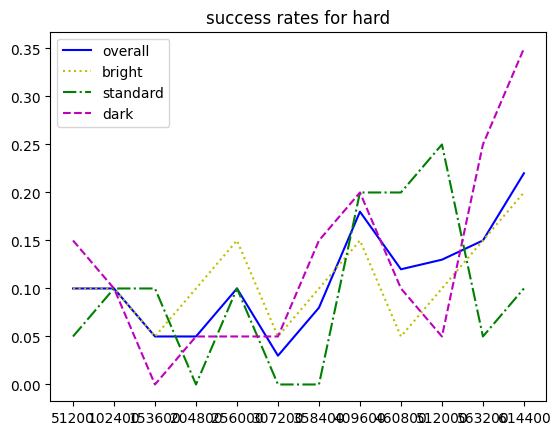

In [3]:
working_dir = "hard_standard_eval"

plot_difficulty_lights(difficulty = "hard")

In [4]:
def plot_difficulty_comparison():
    plt.close()
    
    x_total, y_total = read_statfile(f'success_rate.csv')
    x_easy, y_easy = read_statfile(f'success_easy_across_light_settings.csv')
    x_medium, y_medium = read_statfile(f'success_medium_across_light_settings.csv')
    x_hard, y_hard = read_statfile(f'success_hard_across_light_settings.csv')
    
    
    plt.plot(x_total , y_total, linestyle='-', color='b', label=f'total')
    plt.plot(x_easy , y_easy, linestyle=':',color='y', label=f'easy')
    plt.plot(x_medium , y_medium, linestyle='-.',color='g', label=f'medium')
    plt.plot(x_hard , y_hard, linestyle='--',color='m', label=f'hard')
    plt.title(f'success rates (accross light settings)')
    plt.legend()
    plt.savefig(f'{working_dir}/all_difficulties_success_rate_comparison')

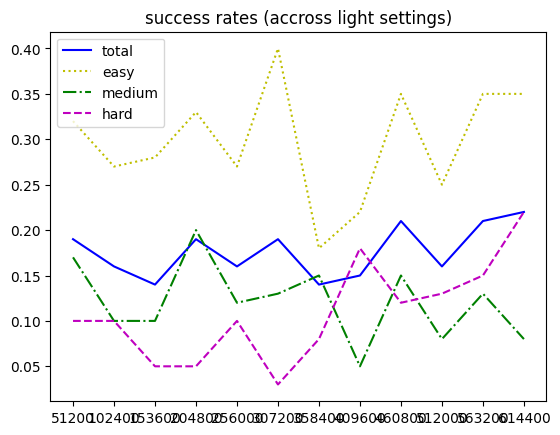

In [5]:
plot_difficulty_comparison()

# individual success rates

Barplot
y-Axis: one achieved success rate (e.g. medium standard)
x-Axis: training settings

In [6]:
isolated_light_settings = ("bright", "standard", "dark")
isolated_difficulty_settings = ("easy", "medium", "hard")


def get_success_rate_isolated(sr_name, light, difficulty):
    target_dir = f'results/isolated_runs_results/{difficulty}-{light}/eval'
    
    filename = f'{target_dir}/success_{sr_name}.csv'
    print(f'filename {filename}')
    
    x =[]
    y = []

    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(row[0])
            y.append(round(float(row[1]), 2))
            
    success_rate = y[-1]
    # final success_rate is the very last entry
    # the sb3_ppo.py is written to do an eval (on the best model) after training
        
    return success_rate
    

def get_success_rates_isolated(sr_name):
    srs= {}
    for light in isolated_light_settings:
        ls_srs = []
        
        for difficulty in isolated_difficulty_settings:
            difficulty_success_rate = get_success_rate_isolated(sr_name, light, difficulty)
            ls_srs.append(difficulty_success_rate)
        
        
        srs[light] = ls_srs
    return srs

def success_rate_bar_plot_by_training_setting(sr_name):
    
    success_rates = {
        'bright': (18.35, 18.43, 14.98),
        'standard': (38.79, 48.83, 47.50),
        'dark': (189.95, 195.82, 217.19),
    }
    
    success_rates = get_success_rates_isolated(sr_name)
    
    

    x = np.arange(len(isolated_difficulty_settings))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for light_setting, difficulty_achieved_sr in success_rates.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, difficulty_achieved_sr, width, label=light_setting)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(f'{sr_name}')
    ax.set_title(f'{sr_name} for isolated training settings')
    ax.set_xticks(x + width, isolated_difficulty_settings)
    ax.legend(loc='upper left') #, ncols=3)
    ax.set_ylim(0, 1)

    plt.show()

filename results/isolated_runs_results/easy-bright/eval/success_easy_standard.csv
filename results/isolated_runs_results/medium-bright/eval/success_easy_standard.csv
filename results/isolated_runs_results/hard-bright/eval/success_easy_standard.csv
filename results/isolated_runs_results/easy-standard/eval/success_easy_standard.csv
filename results/isolated_runs_results/medium-standard/eval/success_easy_standard.csv
filename results/isolated_runs_results/hard-standard/eval/success_easy_standard.csv
filename results/isolated_runs_results/easy-dark/eval/success_easy_standard.csv
filename results/isolated_runs_results/medium-dark/eval/success_easy_standard.csv
filename results/isolated_runs_results/hard-dark/eval/success_easy_standard.csv


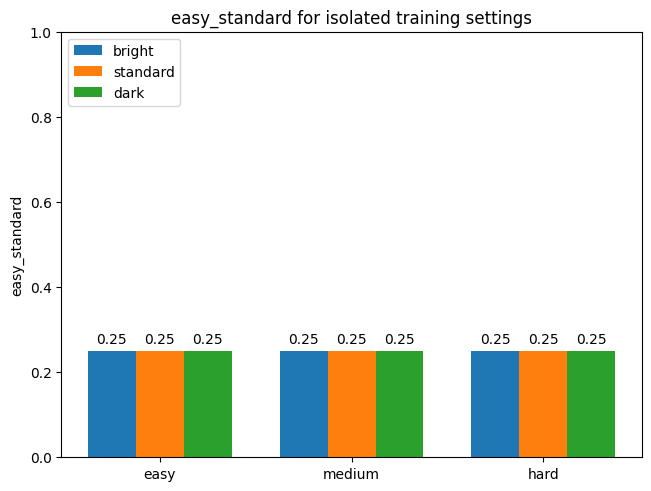

In [7]:
success_rate_bar_plot_by_training_setting(f'easy_standard')

# display results of one eval

In [8]:
color_mapping = {"overall": "blue", "bright":"yellow", "standard":"orange","dark":"red"}
color_mapping = {"overall": "blue", "bright":"lightgrey", "standard":"darkgrey","dark":"dimgrey"}

color_mapping = {"overall": "#a2a2a2", "bright":"#9cd2f6", "standard":"#158fe0","dark":"#0d5686"}
# https://www.colorhexa.com/106daa

def get_success_rate(target_dir, sr_name):
    filename = f'results/{target_dir}/eval/success_{sr_name}.csv'
    
    
    x =[]
    y = []

    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(row[0])
            y.append(round(float(row[1]), 2))
            
    success_rate = y[-1]
    # final success_rate is the very last entry
    # the sb3_ppo.py is written to do an eval (on the best model) after training
        
    return success_rate

def all_success_rates_bar_plot(target_dir):
    
    if not os.path.exists("latex_images/from_notebook/"):
        os.mkdir("latex_images/from_notebook/")
    
    light_settings = {"overall": [], "bright":[], "standard":[], "dark":[]}
    difficulties = ["easy","medium","hard"]
    
    
    
    for d in difficulties:
        for ls in light_settings.keys():
            if ls == "overall":
                sr_name = f'{d}'
            else:
                sr_name = f'{d}_{ls}'
            success_rate = get_success_rate(target_dir, sr_name)
            light_settings[ls].append(success_rate)
    
    

    x = np.arange(len(difficulties))  # the label locations
    width = 0.2  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in light_settings.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, color = color_mapping[attribute])
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    
    ax.set_title(f'Success rates')
    ax.set_xticks(x + 1.5*width, difficulties)
    ax.legend(loc='lower right') #, ncols=3)
    
    #fig.tight_layout()
    filename = f'latex_images/from_notebook/{target_dir}_all_success_rates_barplot.png'
    plt.savefig(filename)
    plt.show()
    
def light_setting_success_rates_bar_plot(target_dir, light_setting):
    
    if not os.path.exists("latex_images/from_notebook/"):
        os.mkdir("latex_images/from_notebook/")
    
    difficulties = ["easy","medium","hard"]
    success_rates = []
    
    for d in difficulties:
        
        if light_setting == "overall":
            sr_name = f'{d}'
        else:
            sr_name = f'{d}_{light_setting}'
        success_rate = get_success_rate(target_dir, sr_name)
        success_rates.append(success_rate)
    
    # https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py

    x = np.arange(len(difficulties))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    bars = ax.bar(difficulties, success_rates, label=difficulties, color=color_mapping[light_setting])

    ax.bar_label(bars)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    
    ax.set_title(f'Success rates for {light_setting} light condition')
    ax.set_xticks(x, difficulties)
    #ax.set_ylim(0, 1)
    
    #fig.tight_layout()
    filename = f'latex_images/from_notebook/{target_dir}_{light_setting}_success_rates_barplot.png'
    plt.savefig(filename)
    plt.show()
    


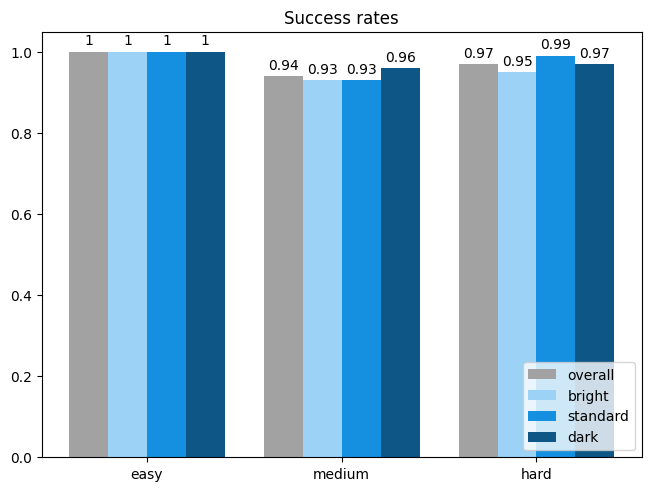

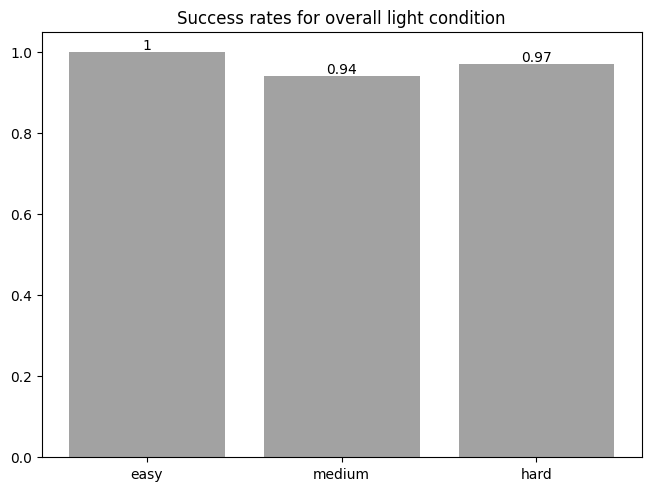

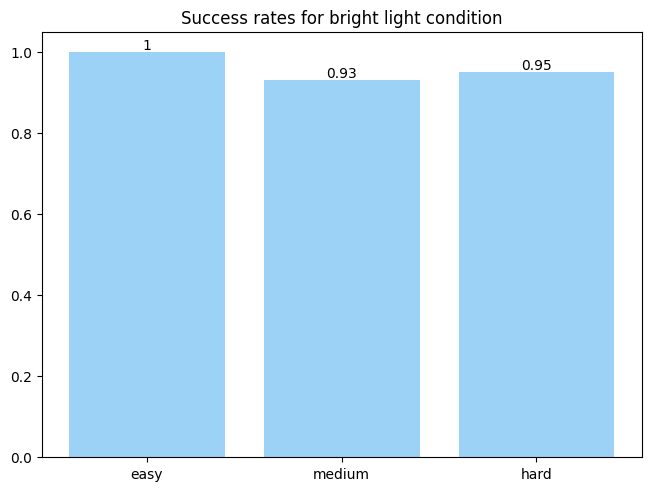

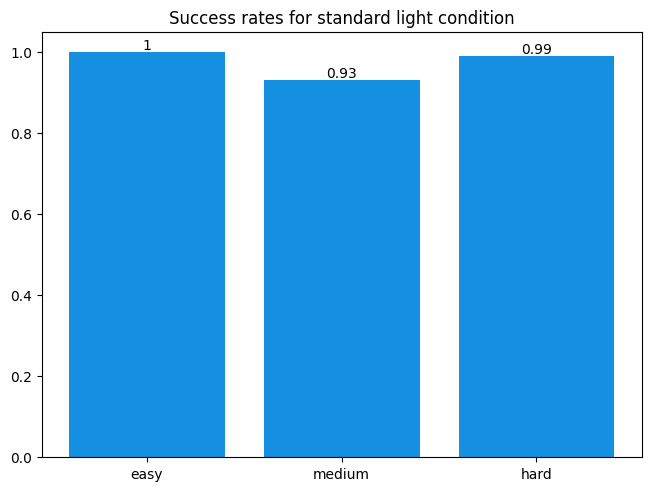

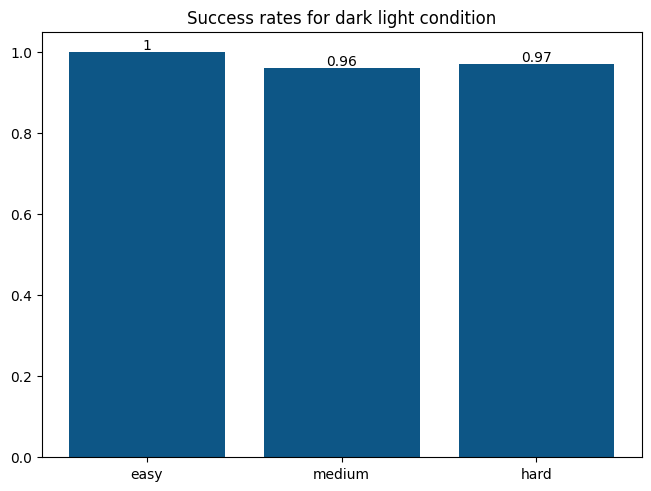

In [9]:
analyse_results_dir="success_trainedHardStandardDistanceRewardEval"

all_success_rates_bar_plot(analyse_results_dir)

light_settings = ["overall","bright","standard","dark"]
for ls in light_settings:
    light_setting_success_rates_bar_plot(analyse_results_dir, ls)